# Project: Megaline Prepaid Plans Analysis

## Introduction:

Hey there! I'm excited to welcome you to the Megaline Prepaid Plans Analysis project. My goal is to help Megaline fine-tune their advertising budget by figuring out which prepaid plan—Surf or Ultimate—brings in more revenue. In this initial analysis, I'll be digging into the data of 500 Megaline clients. We'll explore their demographics, plan usage, and communication behavior, looking at calls, text messages, and internet usage throughout the year 2018. My aim is to derive actionable insights that can guide their marketing strategies and boost revenue generation. Join me on this data-driven journey as we uncover the narrative behind Megaline's prepaid plans.


## Initialization

In [1]:
# Loading all the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math as mt
from scipy import stats as st
import requests
from io import BytesIO

## Load data

In [28]:
try: 
    # reading datasets from public google sheet
    spreadsheet_id = "1dpaC8KV4S3mvX-y2JeHbOhOcYMlW-f7nxnRHC3sy2DA"

    users_gid = '225469003'
    users_link = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={users_gid}"
    r = requests.get(users_link) 
    users_df = pd.read_csv(BytesIO(r.content)) 

    plans_gid = "1458189941"
    plans_link = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={plans_gid}"
    r = requests.get(plans_link)
    plans_df = pd.read_csv(BytesIO(r.content))

    messages_gid = "2141929476"
    messages_link = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={messages_gid}"
    r = requests.get(messages_link)
    messages_df = pd.read_csv(BytesIO(r.content))

    internet_gid = "141355132"
    internet_link = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={internet_gid}"
    r = requests.get(internet_link)
    internet_df = pd.read_csv(BytesIO(r.content))

    calls_gid = "2137793172"
    calls_link = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={calls_gid}"
    r = requests.get(calls_link)
    calls_df = pd.read_csv(BytesIO(r.content))
except:
    # reading datasets from project directory
    users_df = pd.read_csv('/datasets/megaline_users.csv')
    calls_df = pd.read_csv('/datasets/megaline_calls.csv')
    messages_df = pd.read_csv('/datasets/megaline_messages.csv')
    internet_df = pd.read_csv('/datasets/megaline_internet.csv')
    plans_df = pd.read_csv('/datasets/megaline_plans.csv')

## Prepare the data

**In this section I will inspect all of the datasets for the following errors:**

- *Improper Labeling of Columns*
- *Inappropriate Data Types*
- *Missing Data*
- *Duplicate Data*

**In order to do so efficiently I will create a function called `investigate()` which will take one parameter (a dataframe) and return the results from calling `info()` and `head()` on the dataframe**

In [3]:
def investigate(df):
    return [df.info(), display(df.head())]

# **Plans**

In [4]:
# Print the general/summary information about the plans' DataFrame
investigate(plans_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[None, None]

**Since the `plans` dataset only contains info about the two plans being compared against each other, Surf & Ultimate, I plan re-assign the index to the `plan_name` column for more intuitive accessibility later in the project**

In [5]:
# Print a sample of data for plans
plans_df.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


**This dataset is clean. There are no inappropriate data types, missing values, or duplicate values. All of the column labels properly employ camel case and are all lower case. Other than resetting the index, no major problems needed to be addressed**

## Fix data

In [6]:
# modifying the index of the original dataframe
plans_df.set_index('plan_name', inplace=True)

# **Users**

In [7]:
# Print the general/summary information about the users' DataFrame
investigate(users_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[None, None]

In [8]:
# Print a sample of data for users
users_df.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
292,1292,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,surf,NaN
162,1162,Mark,Farley,20,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,ultimate,NaN
407,1407,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
349,1349,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN
455,1455,Jude,Fischer,20,"Denver-Aurora-Lakewood, CO MSA",2018-08-13,surf,NaN
460,1460,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,NaN
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaN
169,1169,Hai,Bean,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-06,surf,NaN
442,1442,Terrell,Caldwell,66,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-25,ultimate,NaN


In [9]:
# Checking for duplicates
print(f'There are {users_df.duplicated().sum()} duplicate rows')
print(f"There are {users_df['user_id'].duplicated().sum()} duplicate values in the user_id column")

There are 0 duplicate rows
There are 0 duplicate values in the user_id column


**Looking at the `users` dataset I noticed that the columns `reg_date`, which is supposed to reflect the date that the user first subscribed to the service, & `churn_date`, which is supposed to reflect the day the user stopped using the service, were both interpretted by pandas as `object` types, meaning pandas thinks these are strings. I will have to type cast these columns to the `datetime` data type in order to perform operations on them later in our analysis. These dates are also not formatted as described in the data dictionary which says it should be in `dd-mm-yy` format when it is in `yyyy-mm-dd` format. Another small issue is the missing data in the `churn_date` column. The data dictionary states that if a value is missing in this column, it means the user's service was active when this data was extracted which means that this data isn't really missing since its absence communicates that the plan is active. To remedy this, I will replace all missing values in this column with a placeholder value. We may look to remove the 'MSA' text at the end of every value in the city column as well, but this isn't crucial. After a quick google search, I believe this stands for "Metropolitan Statistical Area", which doesn't add too much valuable info. This issue isn't crucial though.**

**Other than the aforementioned issues, the rest of the data set is clean.**

### Fix Data

In [11]:
# First I will address the innappropriate data types for churn_date and reg_date
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

In [12]:
investigate(users_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


[None, None]

# **Calls**

In [29]:
# Print the general/summary information about the calls' DataFrame
investigate(calls_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[None, None]

In [15]:
# Print a sample of data for calls
calls_df.sample(5)

,id,user_id,call_date,duration
127625,1456_622,1456,2018-06-26,0.00
60376,1217_197,1217,2018-10-25,3.08
125697,1445_112,1445,2018-04-28,9.92
8639,1041_74,1041,2018-06-08,0.00
72131,1256_436,1256,2018-10-18,1.48


In [17]:
# Checking for duplicate rows
print(f"There are {calls_df.duplicated().sum()} duplicate rows")

There are 0 duplicate rows


**After inspecting the calls data frame I noticed one problem: the `call_date` column has the wrong data type. Pandas interpretted it as a `str` when it should be `datetime`. I will fix this by casting the columns type to `datetime`. The rest of the dataset is clean. There are no duplicate rows and the other columns have their appropriate data types**

### Fix data

In [42]:
# Type casting call_date column from string to datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], errors='coerce')

In [43]:
# Rechecking for missing values in the call_date column after setting the errors paramater equal to coerce in the previous cell 
investigate(calls_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[None, None]

### Enrich data

**The next item I'd like to address is the `duration` column. As we know from the project description, Megaline rounds seconds up to minutes when determining a user's billable call duration, so to make it easier to calculate revenue later in our analysis I will use the `math.ceil()` function, which accepts a numerical value and rounds it up to the next integer, in combination with the `apply()` pandas method, which allows you to apply a function to all elements of a series, to create a new column labeled `billable_duration`**

In [20]:
# Creating new column with billable call durations
calls_df['billable_duration'] = calls_df['duration'].apply(lambda x: mt.ceil(x))

**I am also going to add a new column labeled `month` which will extract the month from `call_date` for each call which will make it easier to calculate statistics for a user for any given month. I will accomplish this by using the `dt.month` accessor object from the `datetime` module on the `call_date` column**

In [41]:
# creating the month column
calls_df['month'] = calls_df['call_date'].dt.month
# casting month column to int64 type
calls_df['month'] = calls_df['month'].astype('int64')

AttributeError: Can only use .dt accessor with datetimelike values

In [22]:
# Inspecting the data frame to make sure both columns were created as expected
investigate(calls_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 137735 non-null  object        
 1   user_id            137735 non-null  int64         
 2   call_date          137735 non-null  datetime64[ns]
 3   duration           137735 non-null  float64       
 4   billable_duration  137735 non-null  int64         
 5   month              137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 5.8+ MB


,id,user_id,call_date,duration,billable_duration,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


[None, None]

# **Messages**

In [30]:
# Print the general/summary information about the messages' DataFrame
investigate(messages_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[None, None]

In [31]:
# Print a sample of data for messages
messages_df.sample(5)

,id,user_id,message_date
42456,1278_156,1278,2018-11-16
5854,1054_221,1054,2018-11-30
32637,1203_282,1203,2018-07-05
41470,1266_101,1266,2018-12-15
20314,1128_283,1128,2018-09-19


**The only issue I see in the messages dataset is an inappropriate data type for the `message_date` column** 

### Fix data

In [32]:
# Casting the message_date column to type datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

**Using the `dt.month` accessor object I am going to extract the month from each date in `message_date` and create a new column labeled `month` in order to easily calculate figures by month later in our analysis**

In [33]:
# Creating month column
messages_df['month'] = messages_df['message_date'].dt.month
# Checking column was properly created
messages_df.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


# **Internet**

In [34]:
# Print the general/summary information about the internet DataFrame
investigate(internet_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[None, None]

In [35]:
# Print a sample of data for the internet traffic
internet_df.sample(5)

,id,user_id,session_date,mb_used
75456,1355_109,1355,2018-12-21,0.00
71227,1332_200,1332,2018-08-05,155.22
16989,1077_109,1077,2018-09-23,584.45
92299,1430_324,1430,2018-12-19,721.79
94711,1440_349,1440,2018-10-21,0.00


**The only thing that needs to be fixed in the internet dataset is the data type of the `session_date` column**

### Fix data

In [36]:
# changing data type of session_date column to type datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
# Making sure type cast was successful
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

**Using the `dt.month` accessor object I am going to extract the month from each date in `session_date` and create a new column labeled `month` in order to easily calculate figures by month later in our analysis**

In [37]:
# Creating month column
internet_df['month'] = internet_df['session_date'].dt.month
# Checking column was created successfully
internet_df.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


# **Study plan conditions**

In [38]:
# Print out the plan conditions and make sure they are clear for you
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# **Aggregate data per user**

**To do this I will group the calls dataframe by the `user_id` & `month` columns and apply the `count()` method to the `id` column to count the number of unique call id's per user, per month. I will then reset the index of the new grouped data frame**

In [40]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls_df.groupby(['user_id', 'month'])['id'].count().reset_index(name='call_count')
calls_per_month.head(20)

KeyError: 'month'

**I'm curious to see how a pivot table can achieve the same result as the `groupby()` method:**

In [ ]:
#calls_per_month = pd.pivot_table(calls_df, 
#                                values='id',
#                                index=['user_id', 'month'],
#                                columns='month',
#                                aggfunc='count',
#                                fill_value=0)

~~**I personally think the pivot table presents the info in a more straight-forward fashion so I will be using the pivot table for any further analysis on users**~~

**As I continued my aggregation of the data, I realized that using pivot tables made the merging of all these aggregate dataframes a more complex process so I ultimately decided to use the `groupby()` method since this lended itself well to future merging**

In [ ]:
# Calculate the amount of minutes spent by each user per month. Save the result.
min_per_month = calls_df.groupby(['user_id', 'month'])['billable_duration'].sum().reset_index(name='total_duration')
min_per_month.head()

,user_id,month,total_duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [ ]:
# Calculate the number of messages sent by each user per month. Save the result.
# I will create a pivot table from messages_df with user_id as the index, id as the values, month as the columns, and count as the aggregate function
#mssgs_per_month = pd.pivot_table(messages_df,
#                                 index=['user_id', 'month'],
#                                 values='id',
#                                 columns='month',
#                                 aggfunc='count',
#                                 fill_value=0)
#mssgs_per_month.head(10)


In [ ]:
mssgs_per_month = messages_df.groupby(['user_id', 'month'])['id'].count().reset_index(name='total_messages')
mssgs_per_month.head()

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [ ]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
mb_per_month = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_used')
mb_per_month.head()

,user_id,month,total_mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [ ]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# The reference df below will create 12 rows for each month of the year for each user because when I initially 
# tried to merge the dfs above it only had rows for the month's where a user's particular statistic wasn't zero
reference_df = pd.DataFrame([(user, month) for user in users_df['user_id'].unique() for month in range(1, 13)], columns=['user_id', 'month'])

# I will now chain multiple left joins in order to create the merged dataframe
merged_df = reference_df.merge(calls_per_month, on=['user_id', 'month'], how='left') \
            .merge(min_per_month, on=['user_id', 'month'], how='left') \
            .merge(mssgs_per_month, on=['user_id', 'month'], how='left') \
            .merge(mb_per_month, on=['user_id', 'month'], how='left')

merged_df.fillna(0, inplace=True)

In [ ]:
# Add the plan information as well as the city for each user for testing hypothesis #2 later in our analysis
master_df = merged_df.merge(users_df[['user_id', 'plan', 'city']], left_on='user_id', right_on='user_id', how='left').set_index(['user_id', 'month'])
master_df = master_df.reset_index().merge(plans_df, left_on='plan', right_on='plan_name', how='left').set_index(['user_id', 'month'])

Time to calculate each user's monthly revenue. To do so I will create four functions to retrieve the following metrics on each user:

- Total internet usage over their plan's limit in GBs since Megaline uses GBs for billing
- Total text messages over their plan's limit
- Total call minutes over their plan's limit 
- Monthly revenue using the above three figures

Using the `apply()` method I will apply each of these functions to `master_df` to create new columns for each of these metrics

In [ ]:
def get_gb_overage(row):
    if row['total_mb_used'] < row['mb_per_month_included']:
        return 0
    else:
        mb = row['total_mb_used'] - row['mb_per_month_included']
        gb_over = np.ceil(mb / 1000) 
        return gb_over

def get_msg_overage(row):
    if row['total_messages'] < row['messages_included']:
        return 0
    else:
        mssgs = row['total_messages'] - row['messages_included'] 
        return mssgs
    
def get_min_overage(row):
    if row['total_duration'] < row['minutes_included']:
        return 0
    else:
        mins = row['total_duration'] - row['minutes_included']
        return mins
    

# Monthly Revenue = (monthly_pay) + (total_minute_overage * usd_per_minute) + (total_message_overage * usd_per_message) + (total_gb_overage * usd_per_gb)
def revenue_calc(row):
    monthly_pay = float(row['usd_monthly_pay'])
    min_over = row['usd_per_minute'] * row['total_minute_overage']
    mssg_over = row['usd_per_message'] * row['total_message_overage']
    internet_over = row['total_gb_overage'] * float(row['usd_per_gb'])
    revenue = monthly_pay + min_over + mssg_over + internet_over 
    return revenue

# Creating the new columns   
master_df['total_gb_overage'] = master_df.apply(get_gb_overage, axis=1)
master_df['total_message_overage'] = master_df.apply(get_msg_overage, axis=1)
master_df['total_minute_overage'] = master_df.apply(get_min_overage, axis=1)

# Calculating monthly revenue
master_df['revenue'] = master_df.apply(revenue_calc, axis=1)                            
master_df.head()

call_count  total_duration  total_messages  total_mb_used  \
user_id month                                                              
1000    1             0.0             0.0             0.0            0.0   
        2             0.0             0.0             0.0            0.0   
        3             0.0             0.0             0.0            0.0   
        4             0.0             0.0             0.0            0.0   
        5             0.0             0.0             0.0            0.0   

                   plan                                   city  \
user_id month                                                    
1000    1      ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   
        2      ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   
        3      ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   
        4      ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   
        5      ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   

               messages_included  mb_per_month_included  minutes_included  \
user_id month                                                               
1000    1                   1000                  30720              3000   
        2                   1000                  30720              3000   
        3                   1000                  30720              3000   
        4                   1000                  30720              3000   
        5                   1000                  30720              3000   

               usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
user_id month                                                                 
1000    1                   70           7             0.01            0.01   
        2                   70           7             0.01            0.01   
        3                   70           7             0.01            0.01   
        4                   70           7             0.01            0.01   
        5                   70           7             0.01            0.01   

               total_gb_overage  total_message_overage  total_minute_overage  \
user_id month                                                                  
1000    1                   0.0                    0.0                   0.0   
        2                   0.0                    0.0                   0.0   
        3                   0.0                    0.0                   0.0   
        4                   0.0                    0.0                   0.0   
        5                   0.0                    0.0                   0.0   

               revenue  
user_id month           
1000    1         70.0  
        2         70.0  
        3         70.0  
        4         70.0  
        5         70.0

# **Study user behaviour**

### Calls

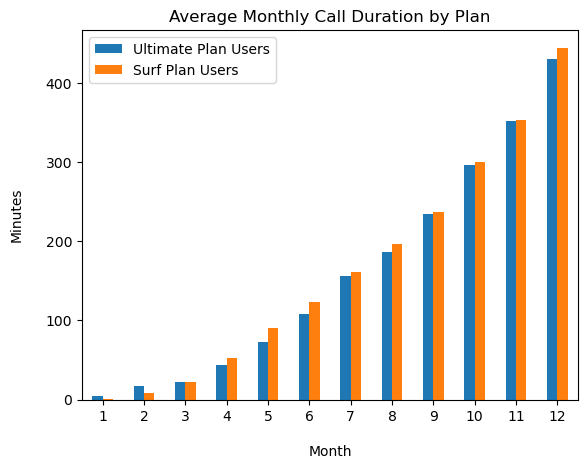

In [ ]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
surf = master_df[master_df['plan'] == 'surf']
ultimate = master_df[master_df['plan'] == 'ultimate']

avg_surf_duration = surf.groupby('month')['total_duration'].mean()
avg_ult_duration = ultimate.groupby('month')['total_duration'].mean()
avg_duration = pd.concat([avg_ult_duration, avg_surf_duration], axis=1)
avg_duration.columns = ['ultimate', 'surf']

avg_duration.plot.bar()
plt.title('Average Monthly Call Duration by Plan')
plt.xlabel('\nMonth')
plt.ylabel('Minutes\n')
plt.xticks(rotation=360)
plt.legend(['Ultimate Plan Users', 'Surf Plan Users'])
plt.show()


**It appears that the average call duration increased throughout the year on both plans**

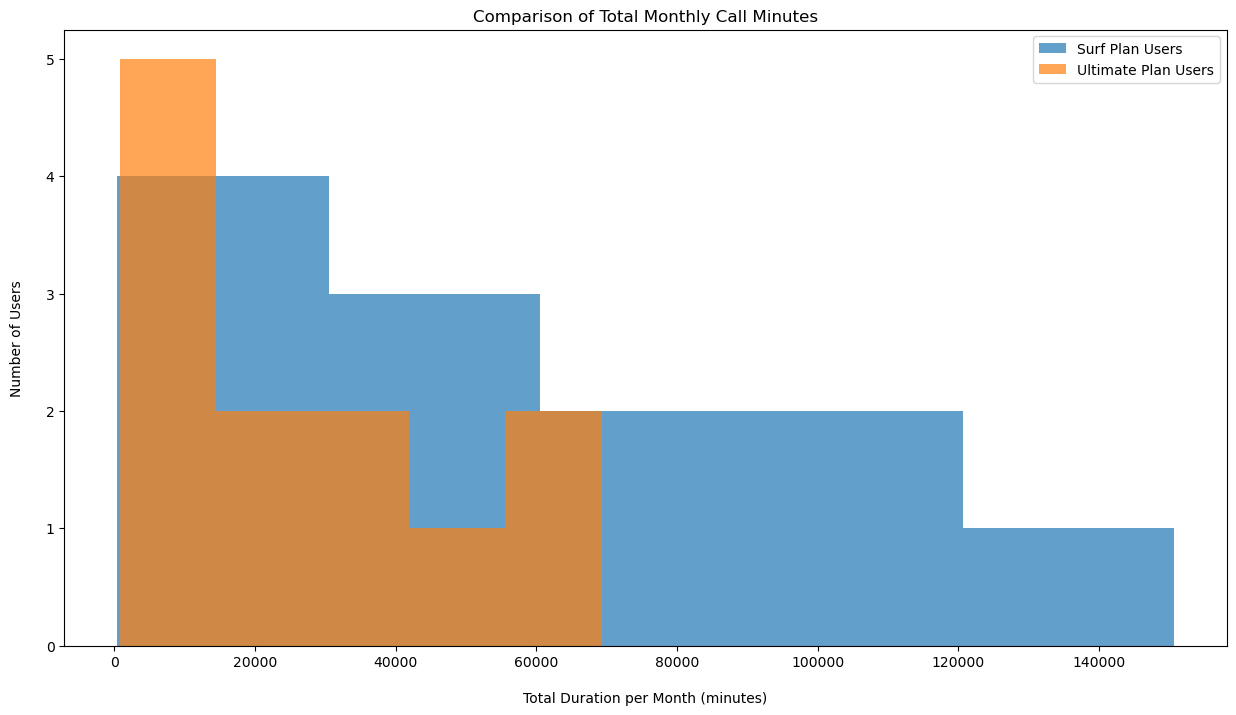

In [ ]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
total_surf_min = surf.groupby('month')['total_duration'].sum()
total_ult_min = ultimate.groupby('month')['total_duration'].sum()
total_min = pd.concat([total_ult_min, total_surf_min], axis=1)
total_min.columns = ['ultimate', 'surf']

plt.figure(figsize=(15,8))
plt.hist(total_min['surf'], bins=5, alpha=0.7)
plt.hist(total_min['ultimate'], bins=5, alpha=0.7)
plt.xlabel('\nTotal Duration per Month (minutes)')
plt.ylabel('Number of Users\n')
plt.title('Comparison of Total Monthly Call Minutes')
plt.legend(['Surf Plan Users', 'Ultimate Plan Users'])
plt.show()

Surf Plan
Mean Monthly Call Duration: 165 minutes, with a Variance of: 19167 minutes

Ultimate Plan
Mean Monthly Call Duration: 160 minutes, with a Variance of: 18458 minutes


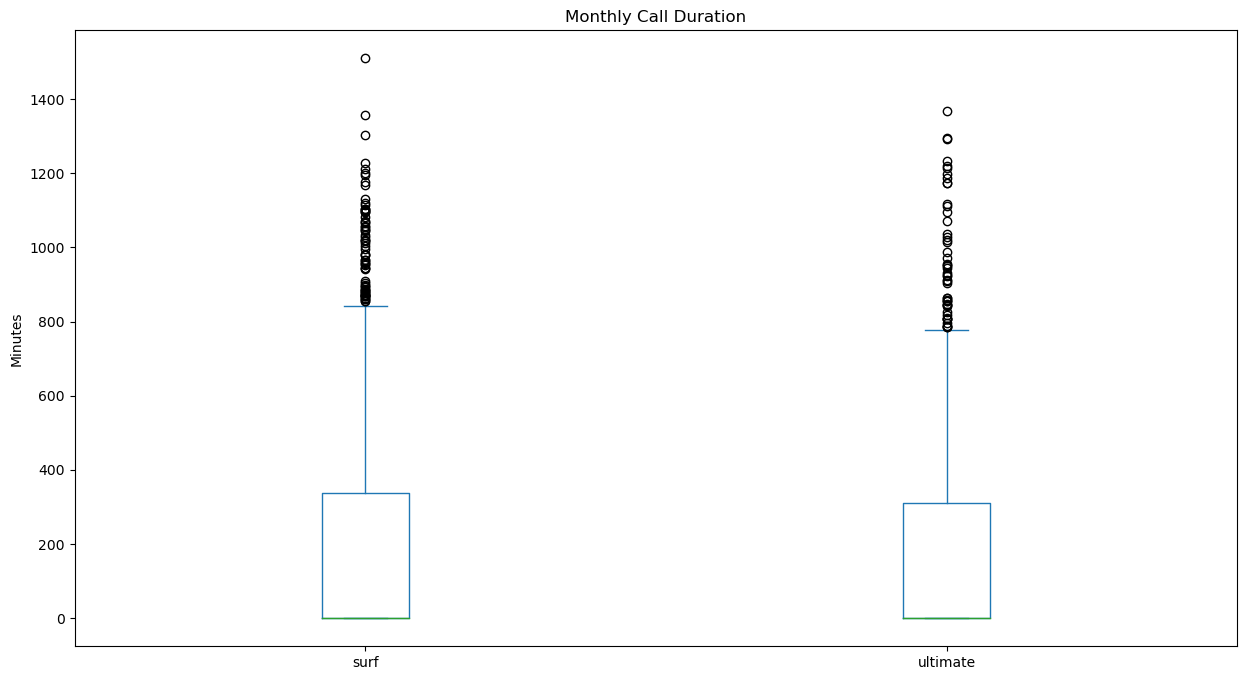

In [ ]:
# Calculate the mean and the variance of the monthly call duration
surf_var = np.var(avg_duration['surf'])
surf_min_mean = avg_duration['surf'].mean()
ultimate_var = np.var(avg_duration['ultimate'])
ultimate_min_mean = avg_duration['ultimate'].mean()

print(f"Surf Plan\nMean Monthly Call Duration: {int(surf_min_mean)} minutes, with a Variance of: {int(surf_var)} minutes")
print()
print(f"Ultimate Plan\nMean Monthly Call Duration: {int(ultimate_min_mean)} minutes, with a Variance of: {int(ultimate_var)} minutes")

# Plot a boxplot to visualize the distribution of the monthly call duration

master_df.plot.box(column='total_duration', by='plan', figsize=(15,8))
plt.title('Monthly Call Duration')
plt.ylabel('Minutes')
plt.show()

**After comparing user's call behavior on each plan it is clear that the data is positively skewed. This is apparent by looking at the box plot & histogram. The most interesting observation was that user's average call duration on both plans increased in tandom as the year went on**

### Messages

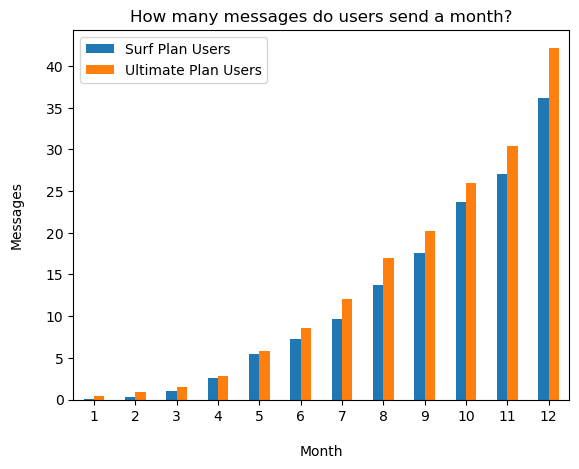

In [ ]:
# Compare the number of messages users of each plan tend to send each month
avg_mssgs_surf = surf.groupby(['month'])['total_messages'].mean()
avg_mssgs_ultimate = ultimate.groupby(['month'])['total_messages'].mean()
avg_mssgs = pd.concat([avg_mssgs_surf, avg_mssgs_ultimate], axis=1)
avg_mssgs.columns = ['surf', 'ultimate']

avg_mssgs.plot.bar()
plt.title('How many messages do users send a month?')
plt.xlabel('\nMonth')
plt.ylabel('Messages\n')
plt.legend(['Surf Plan Users', 'Ultimate Plan Users'])
plt.xticks(rotation=360)
plt.show()


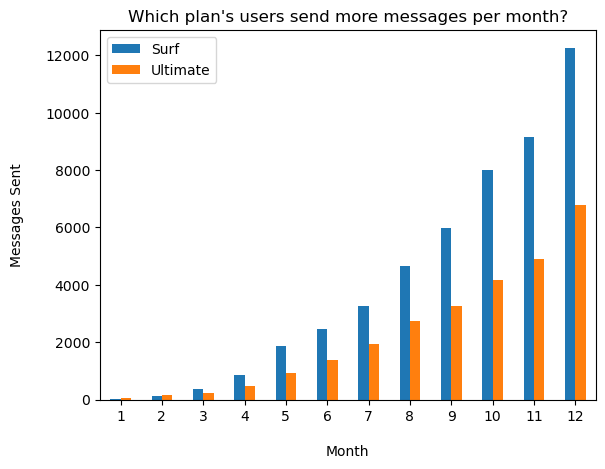

In [ ]:
# Compare the amount of messages sent by users per plan

total_mssgs_pm = pd.concat([surf.groupby('month')['total_messages'].sum(), ultimate.groupby('month')['total_messages'].sum()], axis=1)
total_mssgs_pm.columns = ['Surf', 'Ultimate']

total_mssgs_pm.plot.bar()
plt.title('Which plan\'s users send more messages per month?')
plt.xlabel('\nMonth')
plt.ylabel('Messages Sent\n')
plt.xticks(rotation=360)
plt.show()

Mean Messages Sent (Surf Plan): 12
Messages Sent Variance (Surf Plan): 665
Mean Messages Sent (Ultimate Plan): 13
Messages Sent Variance (Ultimate Plan): 779


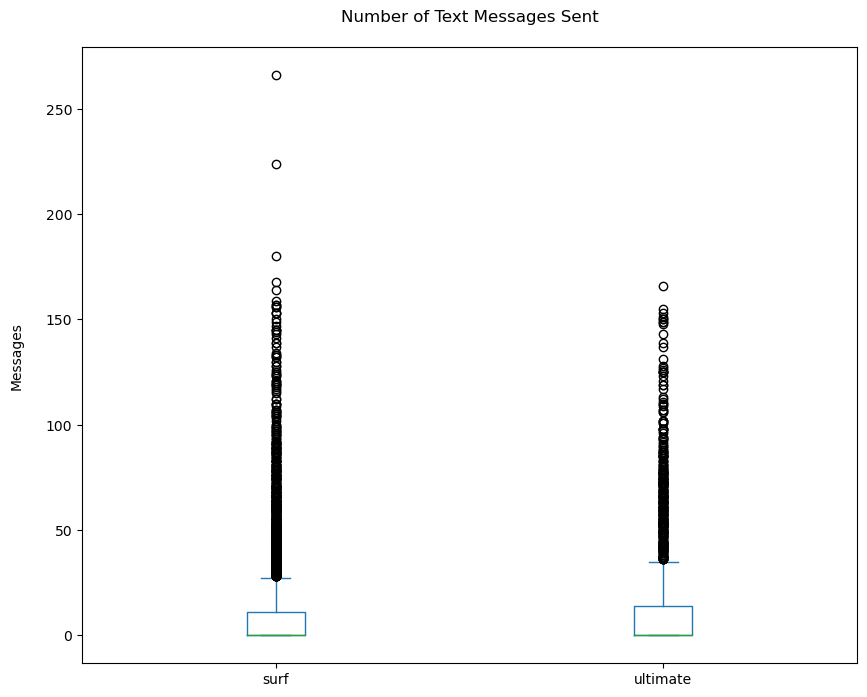

In [ ]:
# Calculate the mean and variance for user's message data from each plan 
mean_mssgs_surf = surf['total_messages'].mean()
var_mssgs_surf = np.var(surf['total_messages'])
mean_mssgs_ultimate = ultimate['total_messages'].mean()
var_mssgs_ultimate = np.var(ultimate['total_messages'])

print(f"Mean Messages Sent (Surf Plan): {int(mean_mssgs_surf)}")
print(f"Messages Sent Variance (Surf Plan): {int(var_mssgs_surf)}")
print(f"Mean Messages Sent (Ultimate Plan): {int(mean_mssgs_ultimate)}")
print(f"Messages Sent Variance (Ultimate Plan): {int(var_mssgs_ultimate)}")

# Visualize the distribution of each plan's total messages sent with a box plot
master_df.plot.box(column='total_messages', by='plan', figsize=(10, 8))
plt.title('Number of Text Messages Sent\n')
plt.ylabel('Messages\n')
plt.show()

**Much like the calls data, the messages data exhibits positive skewness. Notably, users on both plans demonstrated an increasing trend in the number of messages sent per month throughout the year. Interestingly, surf plan users consistently outpaced ultimate plan users, sending significantly more messages per month as the year progressed. This trend adds an intriguing layer to our understanding of user behavior over time.** 

### Internet

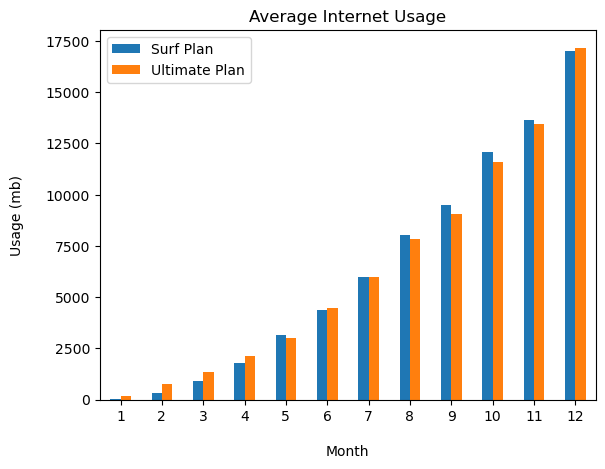

In [ ]:
# Compare the mean monthly internet usage for users on each plan
internet_avg = pd.concat([surf.groupby('month')['total_mb_used'].mean(), ultimate.groupby('month')['total_mb_used'].mean()], axis=1)
internet_avg.columns = ['surf', 'ultimate']
internet_avg.plot.bar()
plt.title('Average Internet Usage')
plt.xlabel('\nMonth')
plt.xticks(rotation=360)
plt.ylabel('Usage (mb)\n')
plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.show()

/var/folders/fj/rldzpsfs50d1btvf157vkzgw0000gn/T/ipykernel_2581/959057126.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  total_internet.colummns = ['surf', 'ultimate']


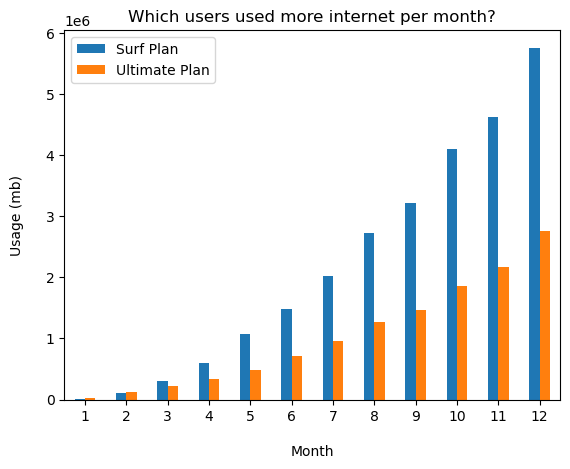

In [ ]:
# Compare the total monthly internet required by users on both plans
total_internet = pd.concat([surf.groupby('month')['total_mb_used'].sum(), ultimate.groupby('month')['total_mb_used'].sum()], axis=1)
total_internet.colummns = ['surf', 'ultimate']

total_internet.plot.bar()
plt.title('Which users used more internet per month?')
plt.xlabel('\nMonth')
plt.xticks(rotation=360)
plt.ylabel('Usage (mb)\n')
plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.show()


The mean internet usage for surf plan users is 6402 megabytes with a variance of 89838336
The mean internet usage for ultimate plan users is 6415 megabytes with a variance of 92225996
      


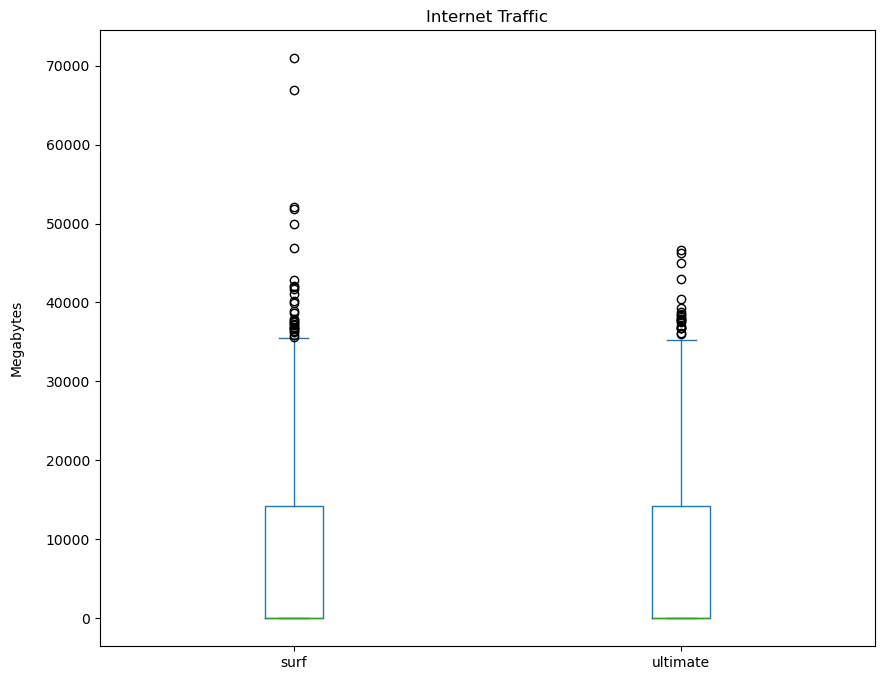

In [ ]:
# Calculate the mean and variance of internet usage for each plan 
surf_internet = {'mean' : surf['total_mb_used'].mean(),
                 'variance' : np.var(surf['total_mb_used'])}
ult_internet = {'mean' : ultimate['total_mb_used'].mean(),
                 'variance' : np.var(ultimate['total_mb_used'])}

print(f'''
The mean internet usage for surf plan users is {int(surf_internet['mean'])} megabytes with a variance of {int(surf_internet['variance'])}
The mean internet usage for ultimate plan users is {int(ult_internet['mean'])} megabytes with a variance of {int(ult_internet['variance'])}
      ''')

# Visualize the distribution 
master_df.plot.box(column='total_mb_used', by='plan', figsize=(10, 8))
plt.title('Internet Traffic')
plt.ylabel('Megabytes\n') 
plt.show()

**In alignment with the trends observed in messages and call duration, the data on internet traffic reflects a consistent increase in average usage on both plans over the course of the year. The positively skewed distribution of internet traffic, evident in the box plot representation for both plans, further emphasizes this upward trajectory. Notably, surf plan users consistently surpassed ultimate plan users, reaching notably higher peaks in internet usage. This distinction is visually highlighted in the bar plot illustrating total internet usage per month.**

# **Revenue**

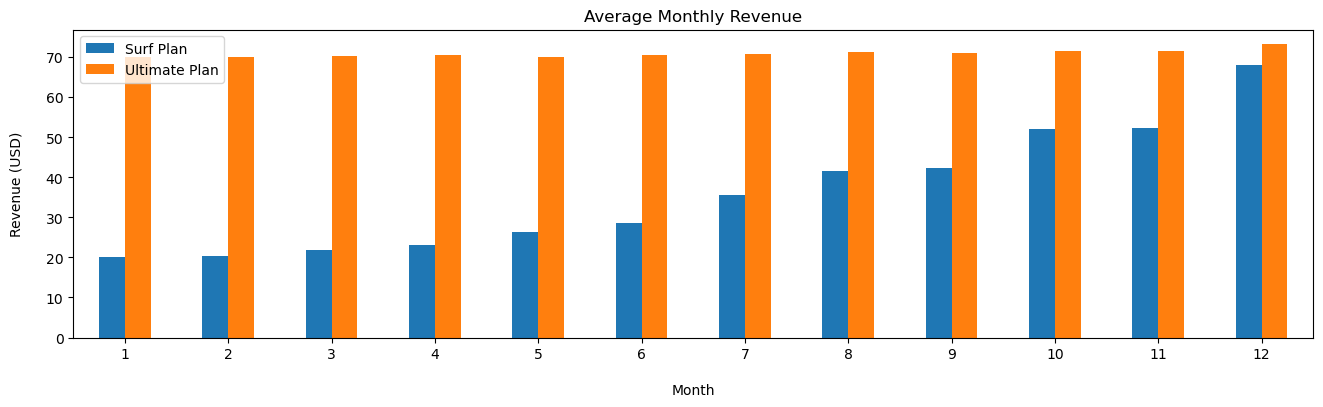

In [ ]:
# compare the average monthly revenue for each plan with a bar plot

revenue = pd.concat([surf.groupby('month')['revenue'].mean(), ultimate.groupby('month')['revenue'].mean()], axis=1)
revenue.columns = ['surf', 'ultimate']

# visualizing it with a bar plot
revenue.plot.bar(figsize=(16,4))
plt.title('Average Monthly Revenue')
plt.xlabel('\nMonth')
plt.xticks(rotation=360)
plt.ylabel('Revenue (USD)\n')
plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.show()

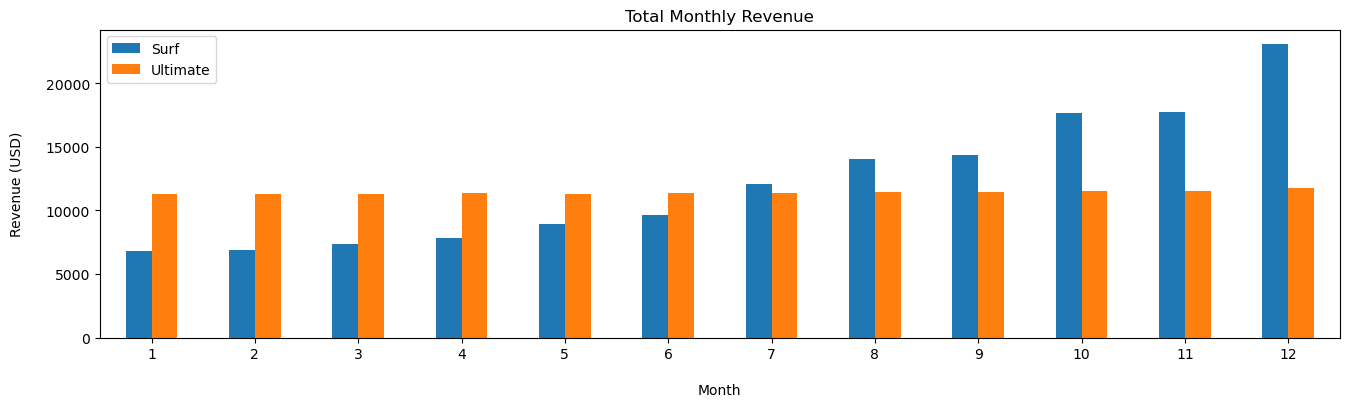

In [ ]:
# comparing the total revenue per month
revenue_sum = pd.concat([surf.groupby('month')['revenue'].sum(), ultimate.groupby('month')['revenue'].sum()], axis=1)
revenue_sum.columns = ['surf', 'ultimate']

# Visualizing sums on a bar plot
revenue_sum.plot.bar(figsize=(16,4))
plt.title('Total Monthly Revenue')
plt.xlabel('\nMonth')
plt.xticks(rotation=360)
plt.ylabel('Revenue (USD)\n')
plt.legend(['Surf', "Ultimate"])


      
The total annual revenue for the surf plan in 2018 was $146531, while the ultimate plan brought in $136955 in revenue in 2018.

The surf plan saw a mean annual revenue of $36 while the ultimate plan saw a mean annual revenue of $70.

The surf plan's standard deviation from the mean was $40 while the ultimate plan had a standard deviation of $7 from the mean.
      



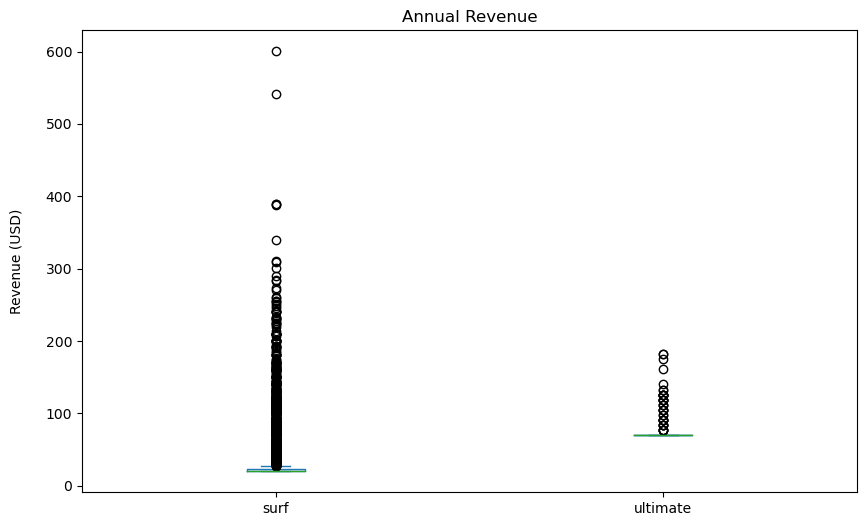

In [ ]:
# for each plan calculate the total annual revenue , mean revenue, standard deviation, & plot the distribution on a box plot

print(f'''
      
The total annual revenue for the surf plan in 2018 was ${int(revenue_sum['surf'].sum())}, while the ultimate plan brought in ${int(revenue_sum['ultimate'].sum())} in revenue in 2018.

The surf plan saw a mean annual revenue of ${int(surf['revenue'].mean())} while the ultimate plan saw a mean annual revenue of ${int(ultimate['revenue'].mean())}.

The surf plan's standard deviation from the mean was ${int(np.std(surf['revenue']))} while the ultimate plan had a standard deviation of ${int(np.std(ultimate['revenue']))} from the mean.
      
''')

# plotting the distribution with a box plot
master_df.plot.box(column='revenue', by='plan', figsize=(10,6))
plt.title('Annual Revenue')
plt.ylabel('Revenue (USD)\n')
plt.show()

## Revenue Analysis Summary:

In 2018, the Surf plan generated a total annual revenue of $146,531, surpassing the Ultimate plan's revenue of $136,955.

Here's a breakdown:

- **Mean Annual Revenue:**
  - Surf Plan: $36
  - Ultimate Plan: $70

- **Standard Deviation from Mean:**
  - Surf Plan: $40
  - Ultimate Plan: $7

### Insights:

1. **Total Revenue Comparison:**
   - The Surf plan outperformed the Ultimate plan, bringing in approximately $10,000 more in revenue during 2018.

2. **Mean Revenue Analysis:**
   - Ultimate plan users, with a mean annual revenue equal to the plan fee, typically stayed within their limits.
   - Surf plan users, with a mean annual revenue of $36, showed a tendency to exceed their plan limits more frequently.

3. **Standard Deviation Reflection:**
   - The larger standard deviation of $40 for the Surf plan hints at a less predictable revenue model, indicating more variability in user behavior compared to the relatively stable Ultimate plan.


# **Test statistical hypotheses**

#### **Hypothesis 1: The average revenue from users of Ultimate and Surf calling plans differs**

Statistical Test: Independent Samples T-Test
- *Since we are not testing a hypotheses on the company Megaline as a whole, but rather two different populations within their customer base, we will test the hypotheses using a two-tailed independent samples test*

Null Hypothesis (H0): The average revenue from users of the Ultimate and Surf calling plans is equal
- *I chose this hypotheses because the null hypotheses is a statement of no difference, so in our scenario of testing whether there is a difference in the average revenue of two plans, the null hypotheses would be the opposite of that*

Alternative Hypothesis (H1): The average revenue from users of the Ultimate and Surf calling plans differs
- *The alternative hypothesis is always the the assumption you are making about the data and what you are testing. In our scenario that is the assumption that the average revenues of the two plans are different*

Alpha Value (Significance Level): 0.05
- *I chose 5% as the significance level because it poses the least amount of risk of rejecting the Null Hypotheses when it is actually true*

In [ ]:
# Test the hypotheses

results = st.ttest_ind(surf['revenue'], ultimate['revenue'], equal_var=False)
alpha = 0.5

if results.pvalue <= alpha:
    print("We can reject the null hypothesis that the average revenue from both plans is equal")
else:
    print("We cannot reject the null hypothesis that the average revenue from both plans is equal")

We can reject the null hypothesis that the average revenue from both plans is equal


#### **Hypothesis 2: The average revenue from users in NY-NJ area is different from that of the users from other regions**

Statistical Test: Independent Samples T-Test
- *Since we are not testing a hypotheses on the company Megaline as a whole, but rather two different populations within their customer base, exactly like in our last hypotheses, we will test the hypotheses using a two-tailed independent samples test*

Null Hypothesis (H0): The average revenue from users in NY-NJ area is equal to that of the users from other regions
- *I chose this hypotheses because the null hypotheses is a statement of no difference, so in our scenario of testing whether there is a difference in the average revenue of customers in the NY-NJ area against customers in the rest of their regions, the null hypotheses would be the opposite of that*

Alternative Hypothesis (H1): The average revenue from users in NY-NJ area is different from that of the users from other regions
- *The alternative hypothesis is always the the assumption you are making about the data and what you are testing. In our scenario that is the assumption that the average revenues of NY-NJ customers and the rest of the customers in the sample are different*

Alpha Value (Significance Level): 0.05
- *I chose 5% as the significance level because it poses the least amount of risk of rejecting the Null Hypotheses when it is actually true*

In [ ]:
# Subsetting data set for our purposes
nynj = master_df[master_df['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
the_rest = master_df[master_df['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

# Checking whether their variances are equal to get the best result from our t-test
print(f"The NY-NJ area has a variance of {int(np.var(nynj['revenue']))}")
print(f"The remaining regions have a variance of {int(np.var(the_rest['revenue']))}")

The NY-NJ area has a variance of 1244
The remaining regions have a variance of 1424


In [ ]:
# Test the hypotheses
results2 = st.ttest_ind(nynj['revenue'], the_rest['revenue'], equal_var=False)
alpha = 0.5

if results2.pvalue < alpha:
    print('There is sufficient evidence to reject the null hypotheses')
else:
    print('There is not sufficient evidence to reject the null hypotheses')

There is sufficient evidence to reject the null hypotheses


# Conclusion

- From the results of this preliminary analysis I can confidently inform Megaline that there is enough evidence to warrant a deeper investigation of their customer data
- There was sufficient evidence to reject the null hypothesis of whether the average revenues between Ultimate & Surf plan users were equal in our first statistical test
- There was also sufficient evidence to reject the null hypothesis of our second statistical test which claimed that the average revenue of NY-NJ customers was the same as customers in the rest of the country
- There are still some interesting questions I have in regards to why users on both plans increased usage of messages, phone calls, & internet usage as the year went on, as well as why there are so many users in both plans which barely utilized their plans capabilities for the first quarter of 2018.